<a href="https://colab.research.google.com/github/jubatistim/GoogleColabsGeneral/blob/master/Colombia_Sales_by_State_Geocoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up environment

*   Google Drive (pull file)
*   Pandas
*   ArcGIS

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd

from geopy.geocoders import ArcGIS

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

downloaded = drive.CreateFile({'id':"1ewkT6CoIysulgeellapSykSnOz6Ao9h4"})   # replace the id with id of file you want to access
downloaded.GetContentFile('Departamentos CO.csv')        # replace the file name with your file

gis = ArcGIS()

# Load Data

In [7]:
data = pd.read_csv('Departamentos CO.csv')

data

,State,Country,Sales
0,AMAZONAS,Colombia,1253
1,ANTIOQUIA,Colombia,253
2,ARAUCA,Colombia,2589
3,ATLANTICO,Colombia,365
4,BOGOTÁ D.C.,Colombia,2456
5,BOLIVAR,Colombia,8523
6,BOYACÁ,Colombia,235
7,CALDAS,Colombia,785
8,CAQUETÁ,Colombia,425
9,CASANARE,Colombia,2568


In [8]:
data["Full Address"] = data["State"] + ", " + data["Country"]

data

,State,Country,Sales,Full Address
0,AMAZONAS,Colombia,1253,"AMAZONAS, Colombia"
1,ANTIOQUIA,Colombia,253,"ANTIOQUIA, Colombia"
2,ARAUCA,Colombia,2589,"ARAUCA, Colombia"
3,ATLANTICO,Colombia,365,"ATLANTICO, Colombia"
4,BOGOTÁ D.C.,Colombia,2456,"BOGOTÁ D.C., Colombia"
5,BOLIVAR,Colombia,8523,"BOLIVAR, Colombia"
6,BOYACÁ,Colombia,235,"BOYACÁ, Colombia"
7,CALDAS,Colombia,785,"CALDAS, Colombia"
8,CAQUETÁ,Colombia,425,"CAQUETÁ, Colombia"
9,CASANARE,Colombia,2568,"CASANARE, Colombia"


In [9]:
data_temp = data.T

data_temp[len(data.index)] = ["Test for None", "None", 0, "XXXXXXXXXXXXXX"]

data = data_temp.T

data

,State,Country,Sales,Full Address
0,AMAZONAS,Colombia,1253,"AMAZONAS, Colombia"
1,ANTIOQUIA,Colombia,253,"ANTIOQUIA, Colombia"
2,ARAUCA,Colombia,2589,"ARAUCA, Colombia"
3,ATLANTICO,Colombia,365,"ATLANTICO, Colombia"
4,BOGOTÁ D.C.,Colombia,2456,"BOGOTÁ D.C., Colombia"
5,BOLIVAR,Colombia,8523,"BOLIVAR, Colombia"
6,BOYACÁ,Colombia,235,"BOYACÁ, Colombia"
7,CALDAS,Colombia,785,"CALDAS, Colombia"
8,CAQUETÁ,Colombia,425,"CAQUETÁ, Colombia"
9,CASANARE,Colombia,2568,"CASANARE, Colombia"


In [25]:
data["Sales"] = data["Sales"].apply(lambda x: float(x))

data

,State,Country,Sales,Full Address,Coordinates,Latitude,Longitude
0,AMAZONAS,Colombia,1253.0,"AMAZONAS, Colombia","(Amazonas, (-1.5359652369999708, -71.501236907...",-1.535965,-71.501237
1,ANTIOQUIA,Colombia,253.0,"ANTIOQUIA, Colombia","(Antioquia, (6.923658670000066, -75.5700213319...",6.923659,-75.570021
2,ARAUCA,Colombia,2589.0,"ARAUCA, Colombia","(Arauca, (7.086930000000052, -70.75868999999994))",7.086930,-70.758690
3,ATLANTICO,Colombia,365.0,"ATLANTICO, Colombia","(Atlántico, (10.682670372000075, -74.963812698...",10.682670,-74.963813
4,BOGOTÁ D.C.,Colombia,2456.0,"BOGOTÁ D.C., Colombia","(Bogotá, D.C., (4.614960000000053, -74.0694099...",4.614960,-74.069410
5,BOLIVAR,Colombia,8523.0,"BOLIVAR, Colombia","(Bolívar, Cauca, (1.8346400000000358, -76.9665...",1.834640,-76.966540
6,BOYACÁ,Colombia,235.0,"BOYACÁ, Colombia","(Boyacá, (5.773693623000042, -73.10336595699994))",5.773694,-73.103366
7,CALDAS,Colombia,785.0,"CALDAS, Colombia","(Caldas, Antioquia, (6.092580000000055, -75.63...",6.092580,-75.636890
8,CAQUETÁ,Colombia,425.0,"CAQUETÁ, Colombia","(Caquetá, (0.8016346990000329, -73.96272982099...",0.801635,-73.962730
9,CASANARE,Colombia,2568.0,"CASANARE, Colombia","(Casanare, (5.404039426000054, -71.60126416599...",5.404039,-71.601264


# Geocode

In [26]:
data["Coordinates"] = data["Full Address"].apply(gis.geocode)

data

,State,Country,Sales,Full Address,Coordinates,Latitude,Longitude
0,AMAZONAS,Colombia,1253.0,"AMAZONAS, Colombia","(Amazonas, (-1.5359652369999708, -71.501236907...",-1.535965,-71.501237
1,ANTIOQUIA,Colombia,253.0,"ANTIOQUIA, Colombia","(Antioquia, (6.923658670000066, -75.5700213319...",6.923659,-75.570021
2,ARAUCA,Colombia,2589.0,"ARAUCA, Colombia","(Arauca, (7.086930000000052, -70.75868999999994))",7.086930,-70.758690
3,ATLANTICO,Colombia,365.0,"ATLANTICO, Colombia","(Atlántico, (10.682670372000075, -74.963812698...",10.682670,-74.963813
4,BOGOTÁ D.C.,Colombia,2456.0,"BOGOTÁ D.C., Colombia","(Bogotá, D.C., (4.614960000000053, -74.0694099...",4.614960,-74.069410
5,BOLIVAR,Colombia,8523.0,"BOLIVAR, Colombia","(Bolívar, Cauca, (1.8346400000000358, -76.9665...",1.834640,-76.966540
6,BOYACÁ,Colombia,235.0,"BOYACÁ, Colombia","(Boyacá, (5.773693623000042, -73.10336595699994))",5.773694,-73.103366
7,CALDAS,Colombia,785.0,"CALDAS, Colombia","(Caldas, Antioquia, (6.092580000000055, -75.63...",6.092580,-75.636890
8,CAQUETÁ,Colombia,425.0,"CAQUETÁ, Colombia","(Caquetá, (0.8016346990000329, -73.96272982099...",0.801635,-73.962730
9,CASANARE,Colombia,2568.0,"CASANARE, Colombia","(Casanare, (5.404039426000054, -71.60126416599...",5.404039,-71.601264


In [27]:
data["Latitude"] = data["Coordinates"].apply(lambda x: x[1][0] if x != None else None)
data["Longitude"] = data["Coordinates"].apply(lambda x: x[1][1] if x != None else None)

data

,State,Country,Sales,Full Address,Coordinates,Latitude,Longitude
0,AMAZONAS,Colombia,1253.0,"AMAZONAS, Colombia","(Amazonas, (-1.5359652369999708, -71.501236907...",-1.535965,-71.501237
1,ANTIOQUIA,Colombia,253.0,"ANTIOQUIA, Colombia","(Antioquia, (6.923658670000066, -75.5700213319...",6.923659,-75.570021
2,ARAUCA,Colombia,2589.0,"ARAUCA, Colombia","(Arauca, (7.086930000000052, -70.75868999999994))",7.086930,-70.758690
3,ATLANTICO,Colombia,365.0,"ATLANTICO, Colombia","(Atlántico, (10.682670372000075, -74.963812698...",10.682670,-74.963813
4,BOGOTÁ D.C.,Colombia,2456.0,"BOGOTÁ D.C., Colombia","(Bogotá, D.C., (4.614960000000053, -74.0694099...",4.614960,-74.069410
5,BOLIVAR,Colombia,8523.0,"BOLIVAR, Colombia","(Bolívar, Cauca, (1.8346400000000358, -76.9665...",1.834640,-76.966540
6,BOYACÁ,Colombia,235.0,"BOYACÁ, Colombia","(Boyacá, (5.773693623000042, -73.10336595699994))",5.773694,-73.103366
7,CALDAS,Colombia,785.0,"CALDAS, Colombia","(Caldas, Antioquia, (6.092580000000055, -75.63...",6.092580,-75.636890
8,CAQUETÁ,Colombia,425.0,"CAQUETÁ, Colombia","(Caquetá, (0.8016346990000329, -73.96272982099...",0.801635,-73.962730
9,CASANARE,Colombia,2568.0,"CASANARE, Colombia","(Casanare, (5.404039426000054, -71.60126416599...",5.404039,-71.601264


# Setup Matplot and Basemaps

In [0]:
!apt-get install libgeos-3.5.0

In [0]:
!apt-get install libgeos-dev

In [0]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

# Plot in a map using the coordinates

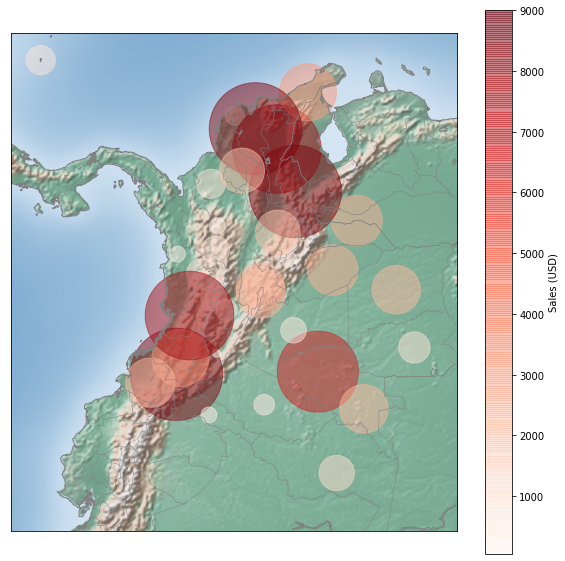

In [38]:
lat = data['Latitude'].values
lon = data['Longitude'].values
sales = data['Sales'].values

# 1. Draw the map background
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=5.0, lon_0=-75,
            width=1.7E6, height=1.9E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter sales data, with color reflecting sales
# and size reflecting sales as well
m.scatter(lon, lat, latlon=True,
          c=sales, s=sales,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label='Sales (USD)')
plt.clim(50, 9000)

# make legend with dummy points
# for a in [3000, 6000, 9000]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label=str(a) + ' Sales (USD)')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');